In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import numpy as np
from scipy import integrate

In [3]:
### Relevant constants
G = 100 # Our Universe, our rules

## initial conditions

m_1 = 1      #earth
m_2 = 1     #sun
m_3 = 0.001      #moon

M_arr = [m_1, m_2, m_3]

n=3
## Z_obj = [[x(0), y(0)], [v_x(0), v_y(0)]]
Z_1 = [[4.5,0],[0,2]]
Z_2 = [[-4.5,0],[0,-2.003]]
Z_3 = [[25,0],[0,3]]

Z_arr=np.array([*Z_1[0],*Z_2[0],*Z_3[0],*Z_1[1],*Z_2[1],*Z_3[1]])
pos_x =[Z_1[0][0],Z_2[0][0],Z_3[0][0]]
pos_y =[Z_1[0][1],Z_2[0][1],Z_3[0][1]]
pos_arr = [pos_x,pos_y]


In [4]:


def func(t,Z_arr ):
    pos_x = [Z_arr[0], Z_arr[2], Z_arr[4]]
    pos_y = [Z_arr[1], Z_arr[3], Z_arr[5]]
    denom = lambda i,j: ((pos_x[i]-pos_x[j])**2+(pos_y[i]-pos_y[j])**2)**(3/2)
    fulloutx = lambda i,j,k: -G*M_arr[j]*(pos_x[i]-pos_x[j])/denom(i,j) -G*M_arr[k]*(pos_x[i]-pos_x[k])/denom(i,k)
    fullouty = lambda i,j,k: -G*M_arr[j]*(pos_y[i]-pos_y[j])/denom(i,j) -G*M_arr[k]*(pos_y[i]-pos_y[k])/denom(i,k)
    
    return [Z_arr[6],Z_arr[7],Z_arr[8],Z_arr[9],Z_arr[10],Z_arr[11],
           fulloutx(0,1,2),fullouty(0,1,2),fulloutx(1,0,2),fullouty(1,0,2), fulloutx(2,1,0),fullouty(2,1,0)]

In [1]:
ts = np.linspace(0,100,5000)
Us = integrate.odeint(func, Z_arr, ts, tfirst=True)
plt.plot(Us[:,0], Us[:,1], label="object one")
plt.plot(Us[:,2], Us[:,3], label="object two")
plt.plot(Us[:,4], Us[:,5], label="object three")
plt.xlabel('position in x')
plt.ylabel('Position in Y')
plt.title('Graph of Particle Mass Motion')
plt.legend()

NameError: name 'np' is not defined

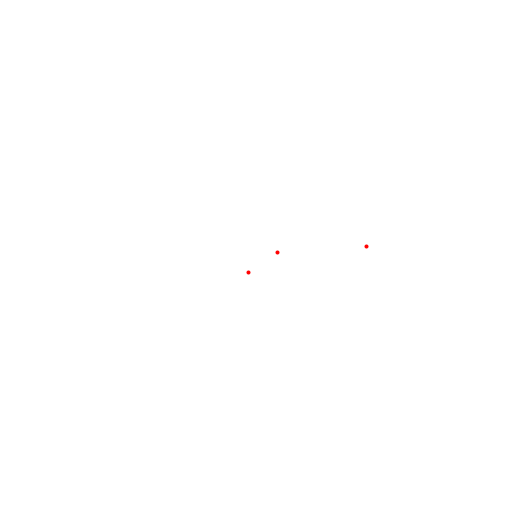

In [21]:
from matplotlib.animation import FuncAnimation

r = integrate.ode(func).set_integrator('dopri5', nsteps=500,max_step = 50000,method='bdf')
r.set_initial_value(Z_arr, 0)

t1 = 100
dt = 0.66

posits = r.integrate(dt)[:(2*n)]
pos_x = [posits[i] for i in range(0,len(posits), 2)]
pos_y = [posits[i] for i in range(1,len(posits), 2)]
    
    
fig = plt.figure(figsize=(7, 7))
ax = fig.add_axes([0, 0, 1, 1], frameon=False)
ax.set_xlim(-60, 60), ax.set_xticks([])
ax.set_ylim(-60, 60), ax.set_yticks([])

scat, = ax.plot(pos_x,pos_y,'r.',lw=2)

def update(frame):
    posits = r.integrate(r.t+dt)[:(2*n)]
    pos_x = [posits[i] for i in range(0,len(posits), 2)]
    pos_y = [posits[i] for i in range(1,len(posits), 2)]
    scat.set_data(pos_x,pos_y)
    #scat.set_sizes(M_arr)
    return scat


# Construct the animation, using the update function as the animation
# director.
animation = FuncAnimation(fig, update, interval=5)
plt.show()

#might have to change this line so that it runs on your computer. I could not get ffmpeg installed and working so videos are included in the repo
animation.save('./tmp/movie.html', writer='html', codec='rawvideo')


array([1, 2, 3])